In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [209]:
links = pd.read_csv('data/ml-latest-small/links.csv')
movies = pd.read_csv('data/ml-latest-small/movies.csv')
ratings = pd.read_csv('data/ml-latest-small/ratings.csv')
tags = pd.read_csv('data/ml-latest-small/tags.csv')

In [3]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


**модель item-to-user (объект к пользователю)**

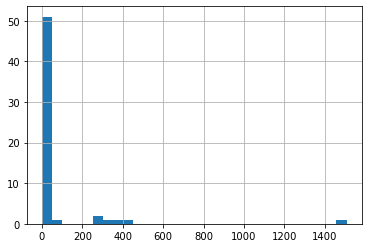

In [6]:
#группируем количесвто тегов по пользователю (т.к ориентируемся на пользователя)
tags.groupby('userId').tag.count().hist(bins=30)

In [7]:
tags.groupby('userId').tag.count().mean()

63.5

In [8]:
#Медиана более усточйчива к выбросам
tags.groupby('userId').tag.count().median()

4.0

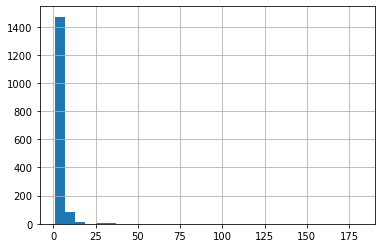

In [9]:
#посомтрим число тегов на фильм
tags.groupby('movieId').tag.count().hist(bins=30)

In [10]:
tags.groupby('movieId').count().head(3)

,userId,tag,timestamp
movieId,,,
1,3,3,3
2,4,4,4
3,2,2,2


In [11]:
tags.groupby('movieId').tag.count().mean()

2.3428753180661577

In [12]:
tags.groupby('movieId').tag.count().median()

1.0

Ставят в среднем 1 тег (особо теги не ставят)

In [13]:
year = []
month = []

for t in tags.timestamp.values:
    data = datetime.fromtimestamp(t)
    year.append(data.year)
    month.append(data.month)

In [14]:
tags['year'] = np.array(year)
tags['month'] = np.array(month)

#или tags['year_month'] = pd.Series(year_month)

In [15]:
tags.head()

,userId,movieId,tag,timestamp,year,month
0,2,60756,funny,1445714994,2015,10
1,2,60756,Highly quotable,1445714996,2015,10
2,2,60756,will ferrell,1445714992,2015,10
3,2,89774,Boxing story,1445715207,2015,10
4,2,89774,MMA,1445715200,2015,10


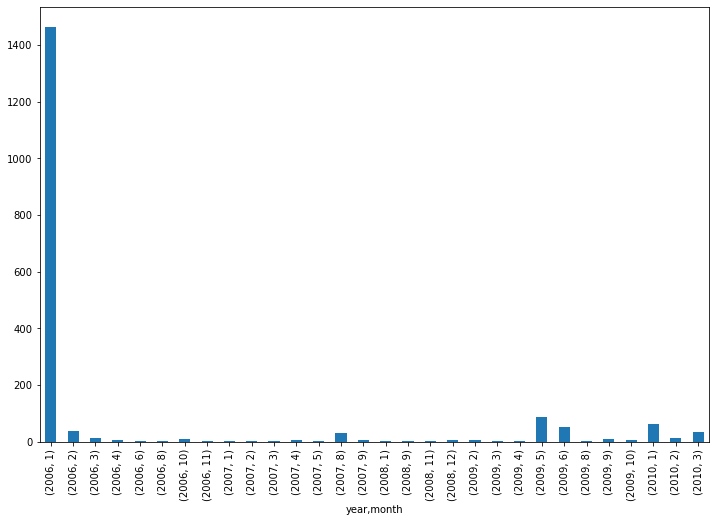

In [16]:
#отсортируем по дате
plt.figure(figsize=(12,8))
tags.groupby(['year','month']).tag.count().sort_index()[:30].plot.bar()

In [17]:
tags['year_month'] = tags.year.astype(str)+' '+ tags.month.astype(str)

In [18]:
tags.head()

,userId,movieId,tag,timestamp,year,month,year_month
0,2,60756,funny,1445714994,2015,10,2015 10
1,2,60756,Highly quotable,1445714996,2015,10,2015 10
2,2,60756,will ferrell,1445714992,2015,10,2015 10
3,2,89774,Boxing story,1445715207,2015,10,2015 10
4,2,89774,MMA,1445715200,2015,10,2015 10


In [19]:
tags.groupby('year_month').tag.count().mean()

50.45205479452055

In [20]:
tags.groupby('year_month').tag.count().median()

5.0

5 тегов в среднем

In [21]:
movies.genres

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: genres, Length: 9742, dtype: object

In [22]:
num_genres = [len(g.split('|')) for g in movies.genres.values]

(array([2.851e+03, 3.218e+03, 2.338e+03, 9.870e+02, 2.710e+02, 6.300e+01,
        1.200e+01, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

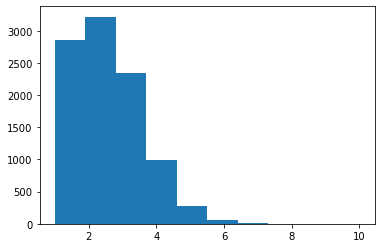

In [23]:
#число жанров
plt.hist(num_genres)

In [24]:
np.mean(num_genres)

2.2668856497639087

In [25]:
np.median(num_genres)

2.0

In [26]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
#функция очищающая посторонние символы
def change_string(s):
    return ' '.join(s.replace(' ','').replace('-','').split('|'))

In [28]:
movies_genres = [change_string(g) for g in movies.genres.values]

In [29]:
print(movies_genres[:3])

['Adventure Animation Children Comedy Fantasy', 'Adventure Children Fantasy', 'Comedy Romance']


**CountVectorizer (считает сколько раз слово попало в предложение)**

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cvr = CountVectorizer()
X_train_columns = cvr.fit_transform(movies_genres)

In [32]:
X_train_columns.toarray()

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
#20 различных жанров
X_train_columns.toarray().shape

(9742, 20)

In [34]:
#выведим их
cvr.vocabulary_

{'adventure': 1,
 'animation': 2,
 'children': 3,
 'comedy': 4,
 'fantasy': 8,
 'romance': 15,
 'drama': 7,
 'action': 0,
 'crime': 5,
 'thriller': 17,
 'horror': 10,
 'mystery': 13,
 'scifi': 16,
 'war': 18,
 'musical': 12,
 'documentary': 6,
 'imax': 11,
 'western': 19,
 'filmnoir': 9,
 'nogenreslisted': 14}

**работа CountVectorizer на более маленькой выборке**

In [35]:
movies_genres[:2]

['Adventure Animation Children Comedy Fantasy', 'Adventure Children Fantasy']

In [36]:
X_train_columns_2 = cvr.fit_transform(movies_genres[:2])
X_train_columns_2.toarray()

array([[1, 1, 1, 1, 1],
       [1, 0, 1, 0, 1]])

In [37]:
cvr.vocabulary_

{'adventure': 0, 'animation': 1, 'children': 2, 'comedy': 3, 'fantasy': 4}

**TF-IDF на тегах и жанрах (используется для оценки важности слова)**

**жанры**

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

In [39]:
tfidf = TfidfTransformer()
X_train_tfidf_1 = tfidf.fit_transform(X_train_columns)
print(X_train_tfidf_1.toarray())

[[0.         0.41684567 0.51622547 ... 0.         0.         0.        ]
 [0.         0.51236121 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.57860574 0.         0.81560738 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [40]:
X_train_tfidf_1.toarray().shape

(9742, 20)

**теги**

In [41]:
tags.tag.values

array(['funny', 'Highly quotable', 'will ferrell', ..., 'gun fu',
       'heroic bloodshed', 'Heroic Bloodshed'], dtype=object)

In [42]:
#получаю матрицу вхождений слов
X_train_columns_teg = cvr.fit_transform(tags.tag.values)

In [43]:
X_train_columns_teg.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
X_train_columns_teg.toarray().shape

(3683, 1744)

In [45]:
X_train_tfidf_2 = tfidf.fit_transform(X_train_columns_teg)
X_train_tfidf_2.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Построить рекомендации (регрессия, предсказываем оценку)**

In [210]:
#объединяем датасеты
movies_and_ratings =  movies.join(ratings.set_index('movieId'), on='movieId')

In [106]:
movies_and_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


In [211]:
from sklearn.preprocessing import LabelEncoder

movies_and_ratings['rating'] = movies_and_ratings['rating'].fillna('Na').astype(str)

In [212]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(movies_and_ratings, movies_and_ratings['rating'], test_size=0.25)

In [114]:
X_train.head()

,movieId,title,genres,userId,rating,timestamp
2982,3994,Unbreakable (2000),Drama|Sci-Fi,28.0,3.0,1.242291e+09
1431,1954,Rocky (1976),Drama,1.0,5.0,9.649822e+08
6361,49651,Rocky Balboa (2006),Action|Drama,580.0,2.0,1.167792e+09
3196,4308,Moulin Rouge (2001),Drama|Musical|Romance,280.0,2.5,1.348435e+09
1137,1488,"Devil's Own, The (1997)",Action|Drama|Thriller,42.0,4.0,9.962210e+08


In [213]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_train

array([5, 5, 4, ..., 7, 9, 3])

In [214]:
del movies_and_ratings['rating']

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix_train = tf.fit_transform(X_train['genres'])

In [170]:
print(tfidf_matrix_train.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.26111748 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [267]:
le.fit(y_test)
y_test = le.transform(y_test)

test = [change_string(g) for g in X_test['genres'].values]
tfidf_matrix_test = tf.transform(test)

In [221]:
lin = LinearRegression()
lin.fit(tfidf_matrix_train, y_train)

LinearRegression()

In [222]:
las = Lasso()
las.fit(tfidf_matrix_train, y_train)

Lasso()

In [271]:
y_pred_1 = lin.predict(tfidf_matrix_test)

In [272]:
y_pred_2 = las.predict(tfidf_matrix_test)

**Оценить RMSE на тестовой выборке**

In [277]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, y_pred_1)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.027983746710481

In [278]:
score = lin.score(tfidf_matrix_test, y_test)
print("Точноть предсказания: %.2f" % (score * 100) + ' %' )

Точноть предсказания: 4.51 %


In [275]:
lin_mse = mean_squared_error(y_test, y_pred_2)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.0753919385990147